In [1]:
#Ignore anything warning comes from prophet

import warnings; 
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
from prophet import Prophet

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [5]:
#Describe the Data

df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [6]:
#Checking if there is anything single unique value?

print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [7]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [8]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year'] +'-'+df['Month']+'-'+df['Day'])

In [9]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [10]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [11]:
# Filtering Method
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]

#Droping

df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [12]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [14]:
# Train the model prophet

m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [15]:
# Forecasting Away creating a model for looking for the future method based on the data we give!

future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.489276,805.110867,3923.621187,3041.489276,3041.489276,-641.915345,-641.915345,-641.915345,467.724032,...,16.611941,16.611941,16.611941,-1126.251318,-1126.251318,-1126.251318,0.0,0.0,0.0,2399.573931
1,2018-01-02,3042.246698,891.229482,3914.411219,3042.246698,3042.246698,-652.029690,-652.029690,-652.029690,467.724032,...,-11.285067,-11.285067,-11.285067,-1108.468655,-1108.468655,-1108.468655,0.0,0.0,0.0,2390.217008
2,2018-01-03,3043.004119,805.104562,3827.861669,3043.004119,3043.004119,-626.188801,-626.188801,-626.188801,467.724032,...,-4.407267,-4.407267,-4.407267,-1089.505566,-1089.505566,-1089.505566,0.0,0.0,0.0,2416.815318
3,2018-01-04,3043.761541,777.255869,4080.451374,3043.761541,3043.761541,-579.252371,-579.252371,-579.252371,467.724032,...,22.462032,22.462032,22.462032,-1069.438435,-1069.438435,-1069.438435,0.0,0.0,0.0,2464.509170
4,2018-01-05,3044.518962,751.497417,4040.630498,3044.518962,3044.518962,-615.260367,-615.260367,-615.260367,467.724032,...,-34.588120,-34.588120,-34.588120,-1048.396280,-1048.396280,-1048.396280,0.0,0.0,0.0,2429.258595


In [16]:
# forecasting the bottom

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4240.642325,2124.431405,5316.614535,4237.405656,4243.974009,-514.955476,-514.955476,-514.955476,467.724032,...,16.611941,16.611941,16.611941,-999.291449,-999.291449,-999.291449,0.0,0.0,0.0,3725.686849
1176,2021-03-23,4241.721263,2058.915015,5330.877252,4238.440491,4245.124971,-532.411629,-532.411629,-532.411629,467.724032,...,-11.285067,-11.285067,-11.285067,-988.850594,-988.850594,-988.850594,0.0,0.0,0.0,3709.309634
1177,2021-03-24,4242.800202,2148.535643,5317.667333,4239.475466,4246.266022,-517.870965,-517.870965,-517.870965,467.724032,...,-4.407267,-4.407267,-4.407267,-981.187730,-981.187730,-981.187730,0.0,0.0,0.0,3724.929237
1178,2021-03-25,4243.879140,2219.976105,5237.124706,4240.496530,4247.406841,-486.699803,-486.699803,-486.699803,467.724032,...,22.462032,22.462032,22.462032,-976.885867,-976.885867,-976.885867,0.0,0.0,0.0,3757.179337
1179,2021-03-26,4244.958078,2094.077778,5243.355770,4241.526651,4248.543076,-543.307143,-543.307143,-543.307143,467.724032,...,-34.588120,-34.588120,-34.588120,-976.443055,-976.443055,-976.443055,0.0,0.0,0.0,3701.650936


In [17]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [18]:
#Filter the data based on 'ds', 'yhat' from the past period to the future period

forecast[['ds', 'yhat']]

,ds,yhat
0,2018-01-01,2399.573931
1,2018-01-02,2390.217008
2,2018-01-03,2416.815318
3,2018-01-04,2464.509170
4,2018-01-05,2429.258595
...,...,...
1175,2021-03-22,3725.686849
1176,2021-03-23,3709.309634
1177,2021-03-24,3724.929237
1178,2021-03-25,3757.179337


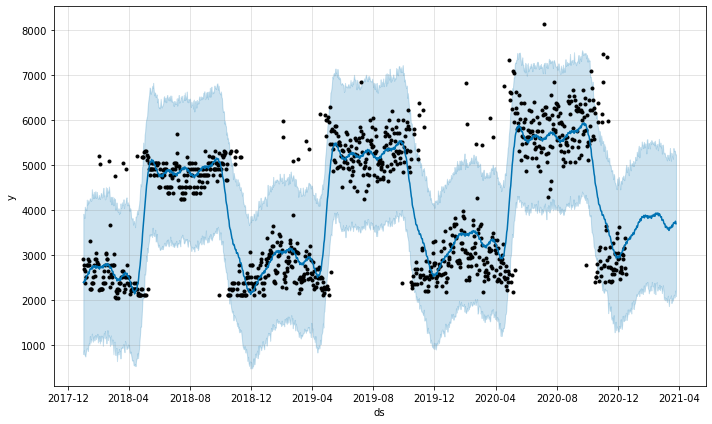

In [19]:
plot1 = m.plot(forecast)

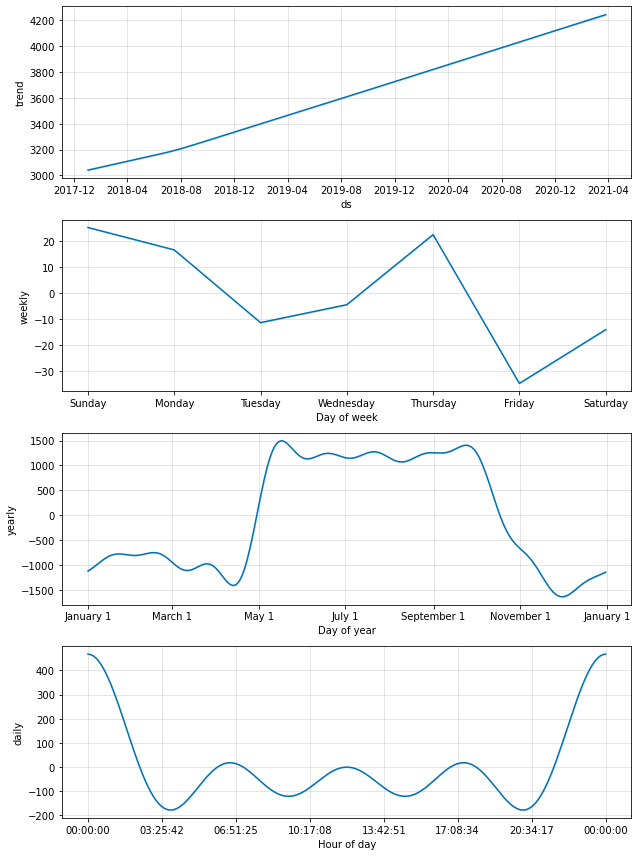

In [20]:
plt2 = m.plot_components(forecast)